# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
! pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 27.6 MB/s eta 0:00:00


2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [4]:
import mysql.connector
from mysql.connector import MySQLConnection
import datetime
import pandas as pd

In [21]:
con = mysql.connector.connect(user = 'user1', password = '7oygWy6P', host = '3.68.62.36', database = 'employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [7]:
cursor = con.cursor()
sql = """
Select max(hire_date), min(hire_date) from employees
"""
cursor.execute(sql)
result = cursor.fetchall()
print(result)

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]


In [8]:
cursor.close()

True

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [23]:
field_names = [i[0] for i in cursor.description]

In [22]:
import pandas as pd

cur = con.cursor()

query = """
SELECT emp_no, salary, from_date, to_date
FROM (
    SELECT emp_no, salary, from_date, to_date,
           ROW_NUMBER() OVER (PARTITION BY emp_no ORDER BY to_date DESC, from_date DESC) as rn
    FROM salaries
) AS subquery
WHERE rn = 1;
"""

cur.execute(query)

rows = cur.fetchall()
columns = [desc[0] for desc in cur.description]

cur.close()
con.close()

res = pd.DataFrame(rows, columns=columns)

# Виводимо необхідну інформацію
print(res.columns.tolist())
print(res.shape)
print(res.head(3))

['emp_no', 'salary', 'from_date', 'to_date']
(300024, 4)
   emp_no  salary   from_date     to_date
0   10001   88958  2002-06-22  9999-01-01
1   10002   72527  2001-08-02  9999-01-01
2   10003   43311  2001-12-01  9999-01-01


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [39]:
type(res['to_date'][0])

datetime.date

In [40]:
res['to_date'].value_counts()

,count
to_date,
9999-01-01,240124
2000-01-19,36
2000-07-15,35
2000-05-31,34
2001-05-24,33
...,...
1986-07-13,1
1985-06-08,1
1987-11-01,1


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

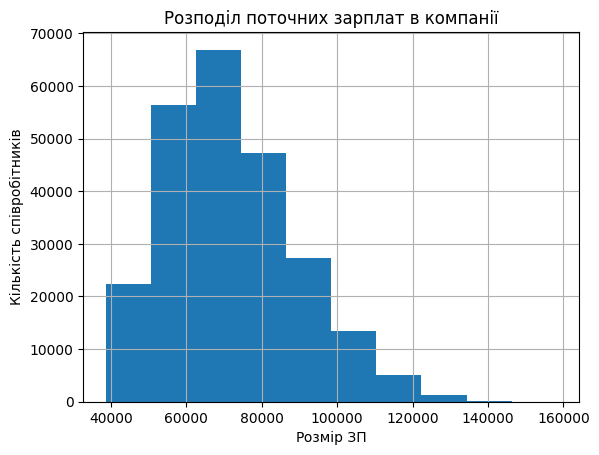

In [52]:
import matplotlib.pyplot as plt

df=res[res['to_date']==datetime.date(9999, 1, 1)]
df.hist(column='salary')

plt.xlabel('Poзмір ЗП')
plt.ylabel('Кількість співробітників')
plt.title('Розподіл поточних зарплат в компанії')

plt.show()


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [53]:
con.close()